Зчитати файл doc2. Вважати кожен рядок окремим документом корпусу. Виконати попередню обробку корпусу.




In [77]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [78]:
file = open('./doc2.txt', 'r')
text = []
for line in file.readlines():
    text.append(line)
text


['Combine all of the marinade ingredients except the orange juice in a blender or food processor.\n',
 'The internet is incredibly competitive for businesses. \n',
 'A melting pot of cultural influences, Algeria is a highly underrated North African tourist destination.\n',
 'Add the orange juice and puree until combined%^%.\n',
 'Predominantly Roman, take your pick %$ from our list of the eight coolest ancient ruins to visit in Algeria.\n',
 'Many of the courses are project-based, too, helping you learn how to develop a well-designed marketing strategy by actually doing it.\n',
 'This National Park is a recent addition to the national parks of Algeria.']

In [79]:
import re

text = [re.sub(r'[^\w\s]', '', line).strip() for line in text]
print(text)

['Combine all of the marinade ingredients except the orange juice in a blender or food processor', 'The internet is incredibly competitive for businesses', 'A melting pot of cultural influences Algeria is a highly underrated North African tourist destination', 'Add the orange juice and puree until combined', 'Predominantly Roman take your pick  from our list of the eight coolest ancient ruins to visit in Algeria', 'Many of the courses are projectbased too helping you learn how to develop a welldesigned marketing strategy by actually doing it', 'This National Park is a recent addition to the national parks of Algeria']


# 1)Представити корпус як модель «Сумка n-грам», взяти біграми. Вивести вектор для orange juice.

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
bv = CountVectorizer(ngram_range=(2, 2))
bv_matrix = bv.fit_transform(text)
bv_matrix = bv_matrix.toarray()
df = pd.DataFrame(bv_matrix, columns=bv.get_feature_names_out())
df


,actually doing,add the,addition to,african tourist,algeria is,all of,ancient ruins,and puree,are projectbased,blender or,...,to the,to visit,too helping,tourist destination,underrated north,until combined,visit in,welldesigned marketing,you learn,your pick
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
5,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
6,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [81]:
print(df['orange juice'])


0    1
1    0
2    0
3    1
4    0
5    0
6    0
Name: orange juice, dtype: int64


# 2)Представити корпус як модель TF-IDF. Кластеризувати документи за допомогою ієрархічної агломераційної кластеризації.

In [82]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage


tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(bv_matrix)
similarity_matrix = cosine_similarity(tt_matrix)
for doc in similarity_matrix:
    print(doc.tolist())



[1.0, 0.0, 0.0, 0.15203632833423616, 0.03452794503790142, 0.03260856764015119, 0.0]
[0.0, 1.0000000000000002, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.15203632833423616, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.03452794503790142, 0.0, 0.0, 0.0, 0.9999999999999998, 0.02880899436614481, 0.0]
[0.03260856764015119, 0.0, 0.0, 0.0, 0.02880899436614481, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0000000000000002]


In [83]:
links = linkage(similarity_matrix, 'complete',)
pd.DataFrame(links, columns=['Document\Cluster 1', 'Document\Cluster 2', 'Distance', 'Cluster Size'], dtype='object')

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipykernel_66645/1438491117.py:2: SyntaxWarning: invalid escape sequence '\C'
  pd.DataFrame(links, columns=['Document\Cluster 1', 'Document\Cluster 2', 'Distance', 'Cluster Size'], dtype='object')
/tmp/ipykernel_66645/1438491117.py:2: SyntaxWarning: invalid escape sequence '\C'
  pd.DataFrame(links, columns=['Document\Cluster 1', 'Document\Cluster 2', 'Distance', 'Cluster Size'], dtype='object')


,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,0.0,3.0,1.200142,2.0
1,4.0,5.0,1.373473,2.0
2,1.0,2.0,1.414214,2.0
3,6.0,9.0,1.414214,3.0
4,8.0,10.0,1.414928,5.0
5,7.0,11.0,1.423155,7.0


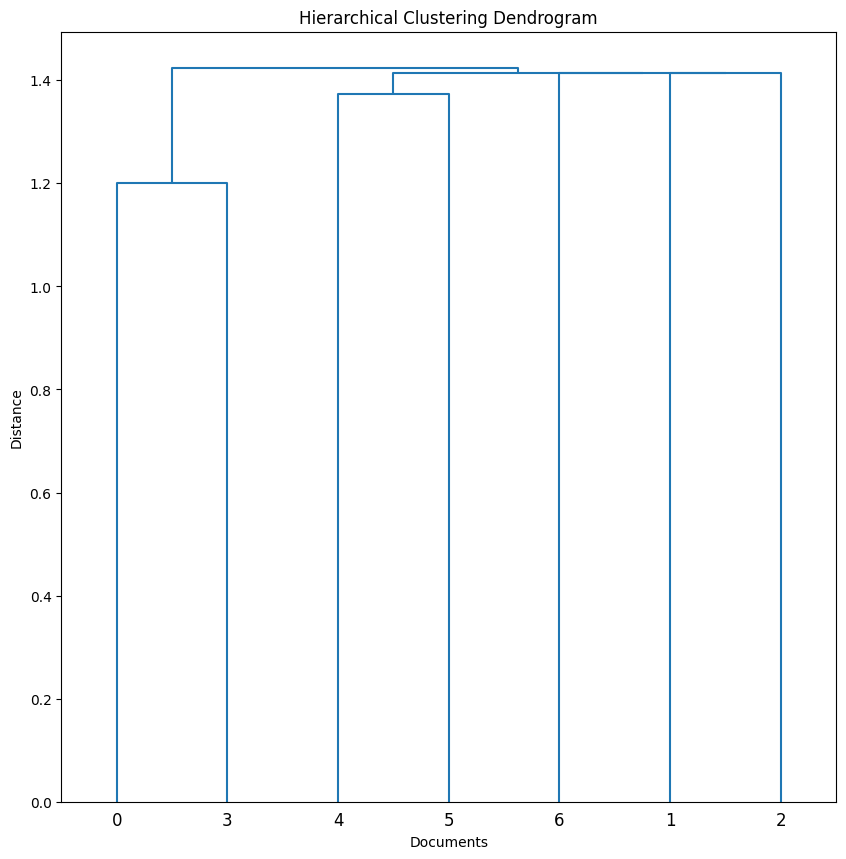

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Documents')
plt.ylabel('Distance')
dendrogram(links)    
plt.show()

In [90]:
from sklearn.metrics import pairwise_distances
similarity_matrix = pairwise_distances(tt_matrix, metric="euclidean")
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6
0,0.000000,1.414214,1.414214,1.302278,1.389584,1.390965,1.414214
1,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214
2,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214
3,1.302278,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214
4,1.389584,1.414214,1.414214,1.414214,0.000000,1.393694,1.414214
5,1.390965,1.414214,1.414214,1.414214,1.393694,0.000000,1.414214
6,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000


In [93]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=4, linkage='ward')
ag.fit(similarity_df)
ag.labels_

array([1, 0, 0, 1, 2, 2, 3])

# 3)Представити корпус як модель FastText. Знайти подібні слова до слів algeria, combine.

In [94]:
import nltk
from gensim.models.fasttext import FastText

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document.lower()) for document in text] 

ft_model = FastText(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=1, epochs=20)

print(ft_model.wv.most_similar("algeria"))
print(ft_model.wv.most_similar("combine"))

[('ingredients', 0.28411778807640076), ('all', 0.24781765043735504), ('visit', 0.21064051985740662), ('orange', 0.17467282712459564), ('incredibly', 0.17071105539798737), ('processor', 0.1402621865272522), ('national', 0.1363813430070877), ('welldesigned', 0.13047729432582855), ('or', 0.12129248678684235), ('add', 0.12112069129943848)]
[('combined', 0.740186333656311), ('helping', 0.2513166069984436), ('our', 0.23990508913993835), ('businesses', 0.22448156774044037), ('strategy', 0.2221427708864212), ('the', 0.22168482840061188), ('welldesigned', 0.1925913244485855), ('how', 0.18907184898853302), ('it', 0.1876714676618576), ('african', 0.17631621658802032)]
